In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data=fetch_california_housing()
X=data.data
y=data.target

In [4]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 16512
Test size: 4128


In [7]:
rf_reg=RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

y_pred=rf_reg.predict(X_test)
print("Baseline MSE:", mean_squared_error(y_test, y_pred))
print("Baseline R2:", r2_score(y_test, y_pred))

Baseline MSE: 0.2553684927247781
Baseline R2: 0.8051230593157366


In [8]:
train_r2=r2_score(y_train, rf_reg.predict(X_train))
test_r2=r2_score(y_test, y_pred)

print("Train R2:", train_r2)
print("Test R2:", test_r2)

Train R2: 0.9735726320302575
Test R2: 0.8051230593157366


In [11]:
rf_reg_tuned=RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    random_state=42
)
rf_reg_tuned.fit(X_train, y_train)

y_pred_tuned=rf_reg_tuned.predict(X_test)

print("Tuned MSE:", mean_squared_error(y_test, y_pred_tuned))
print("Tuned R2:", r2_score(y_test, y_pred_tuned))

Tuned MSE: 0.25245189523074646
Tuned R2: 0.8073487747545508


In [13]:
import pandas as pd

feat_imp_reg = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': rf_reg_tuned.feature_importances_
}).sort_values(by='Importance', ascending=False)

feat_imp_reg

,Feature,Importance
0,MedInc,0.525195
5,AveOccup,0.138350
6,Latitude,0.089073
7,Longitude,0.088914
1,HouseAge,0.054151
2,AveRooms,0.044090
4,Population,0.030610
3,AveBedrms,0.029615


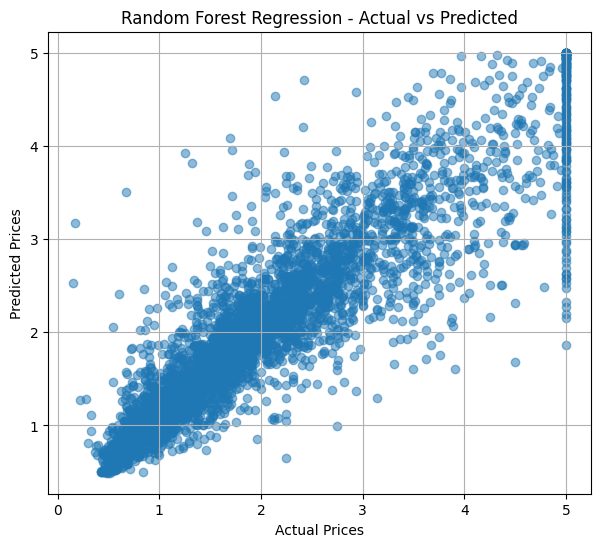

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.grid(True)
plt.show()